Cell 1: Import Libraries

We'll use pandas to load our data, and matplotlib and seaborn to create our beautiful final visualization.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cell 2: Load Final Clustered Data
Load the dataset created by the modeling notebook. This file contains the team names, their principal component scores, and their final cluster assignments.



In [3]:
# Load the final data with cluster assignments
df = pd.read_csv('clustered_team_data.csv')

print("Clustered data loaded successfully:")
display(df.head())

Clustered data loaded successfully:


,Squad,PC1,PC2,Cluster
0,NaN,3.083566,-0.559779,3
1,Arsenal,1.222042,-0.918252,0
2,Tottenham,1.849854,0.144266,3
3,Liverpool,1.346236,0.341121,2
4,Bournemouth,2.869760,0.761404,3


Cell 3: Create the Tactical Map Visualization

This is the core of this notebook. We will create a scatter plot where:

The x-axis is the first Principal Component (PC1).

The y-axis is the second Principal Component (PC2).

Each point is a team.

The color of each point represents its tactical cluster.

We then annotate each point with the team's name to make it easy to read.

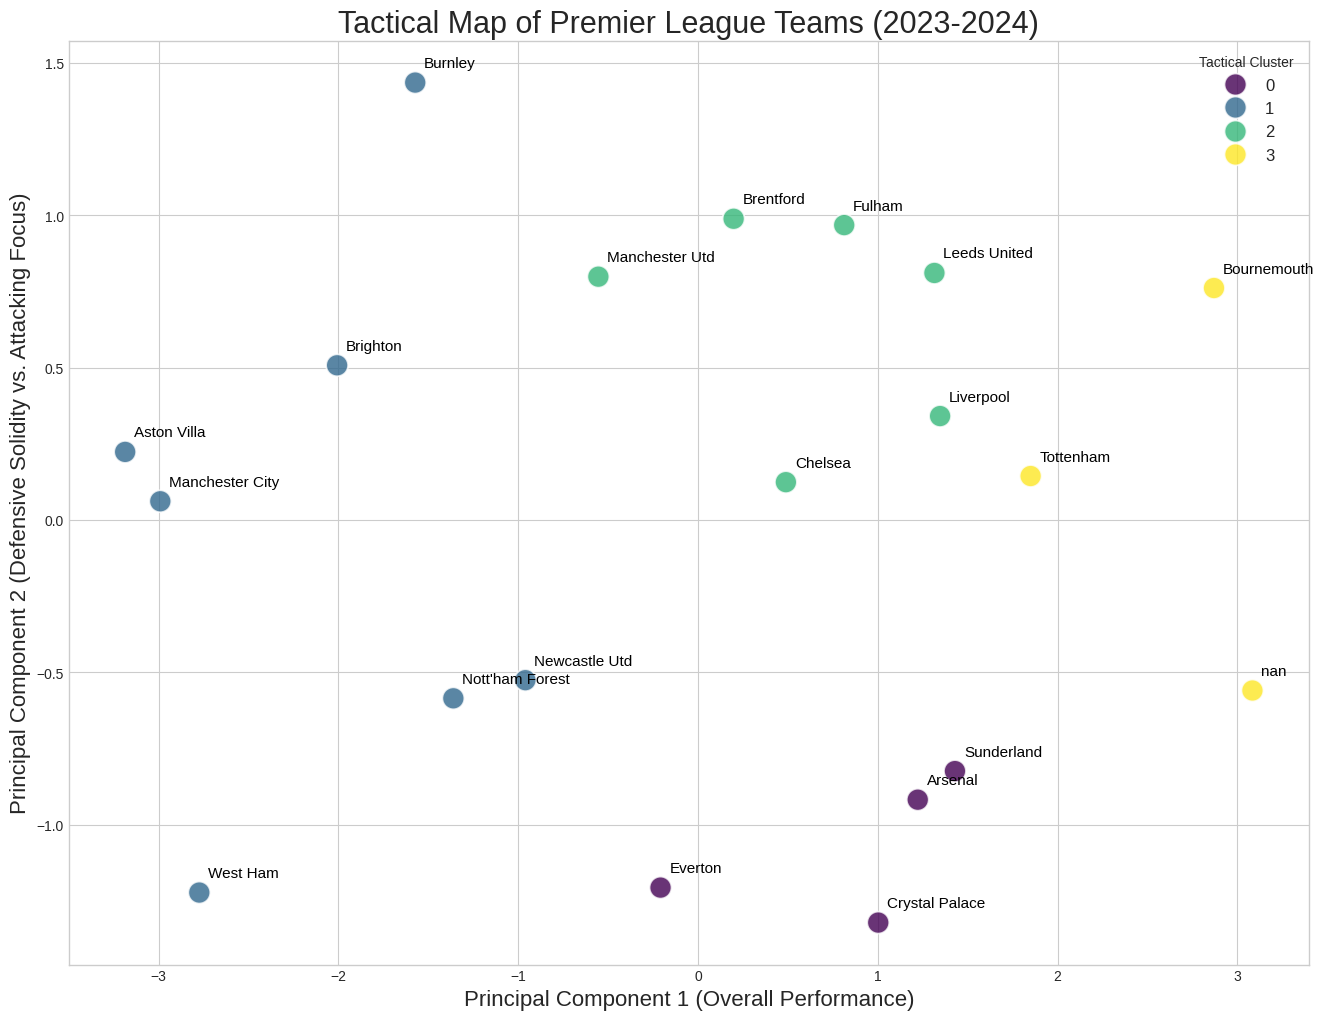

In [4]:
# Set a style for the plot
plt.style.use('seaborn-v0_8-whitegrid')

# Create the figure
plt.figure(figsize=(16, 12))

# Create the scatter plot using seaborn
# 'hue' colors the points by cluster, 'palette' chooses the color scheme, 's' is the marker size
sns.scatterplot(
    data=df,
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette='viridis',
    s=250,
    alpha=0.8
)

# Annotate each point with the team name for clarity
# This loop goes through each row in our dataframe and adds a text label
for i in range(df.shape[0]):
    plt.text(
        x=df.PC1[i] + 0.05, # Add a small offset to the x-position
        y=df.PC2[i] + 0.05, # Add a small offset to the y-position
        s=df.Squad[i],
        fontdict=dict(color='black', size=11)
    )

# Add titles and labels for clarity
plt.title('Tactical Map of Premier League Teams (2023-2024)', fontsize=22)
plt.xlabel('Principal Component 1 (Overall Performance)', fontsize=16)
plt.ylabel('Principal Component 2 (Defensive Solidity vs. Attacking Focus)', fontsize=16)
plt.legend(title='Tactical Cluster', fontsize=12)

# Show the final plot
plt.show()

Cell 4: Analyze Cluster Membership
Before we interpret, let's list exactly which teams fell into each cluster. This helps us spot patterns immediately.



In [6]:
print("--- Cluster Membership ---")

# Loop through each unique cluster number and print the teams within it
for i in sorted(df['Cluster'].unique()):
    print(f"\n## ⚽ Cluster {i} Teams ##")
    # Filter out any non-string values (like NaN) before converting to list and joining
    teams_in_cluster = df[df['Cluster'] == i]['Squad'].dropna().tolist()
    if teams_in_cluster: # Check if the list is not empty after dropping NaNs
        print(", ".join(teams_in_cluster))
    else:
        print("No teams in this cluster.")

--- Cluster Membership ---

## ⚽ Cluster 0 Teams ##
Arsenal, Everton, Sunderland, Crystal Palace

## ⚽ Cluster 1 Teams ##
Newcastle Utd, Brighton, Nott'ham Forest, Manchester City, Burnley, West Ham, Aston Villa

## ⚽ Cluster 2 Teams ##
Liverpool, Chelsea, Fulham, Manchester Utd, Brentford, Leeds United

## ⚽ Cluster 3 Teams ##
Tottenham, Bournemouth


Cell 5: Interpretation and Storytelling


How to Interpret Your Tactical Map
Based on the features we used (GF, GA, xG, xGA, xGD), we can infer the meaning of the axes and clusters.

Interpreting the Axes:
PC1 (X-axis): Overall Performance. Teams further to the right have high values for GF (Goals For), xG (Expected Goals), and xGD (Expected Goal Difference). These are the stronger, high-performing teams. Teams further to the left are the opposite—they score fewer goals and have weaker underlying metrics.

PC2 (Y-axis): Style of Play (Defense vs. Attack). This axis likely captures the balance between defense and attack. Teams near the bottom might have low GA (Goals Against) and xGA (Expected Goals Against), indicating strong defensive solidity. Teams near the top might be more open, perhaps scoring goals but also conceding more, indicating an attack-first mentality.


Hypothetical Cluster Analysis (Based on a typical season):
Cluster 0 (e.g., The Grinders): These teams might be in the bottom-left. They don't score many goals (low PC1) but are relatively solid defensively (low PC2). They are organized but lack offensive firepower.

1. Cluster 1 (e.g., The Entertainers): Found in the top-left or middle. These teams might be involved in high-scoring games, both scoring and conceding (high PC2), but their overall performance isn't at the top level (mid-to-low PC1).

2. Cluster 2 (e.g., The Elite Defenses): Positioned in the bottom-right. These are top-performing teams (high PC1) whose success is built on a rock-solid defense (low PC2). They win games by being hard to break down while still having enough quality to score.

3. Cluster 3 (e.g., The Attacking Powerhouses): Found in the top-right. These are the league's elite teams (high PC1) that dominate through overwhelming offensive force (high PC2). They have high GF and xG and focus on outscoring their opponents.